<a href="https://colab.research.google.com/github/Ishita95-harvad/Celebrity-Tweets-Dataset-Real-vs-AI-Generated-/blob/main/Celebrity_Tweets_Dataset_(Real_vs_AI_Generated).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Celebrity Tweets Dataset (Real vs AI-Generated)**
A labeled dataset of real and AI-generated tweets from celebrities on X/Twitter.

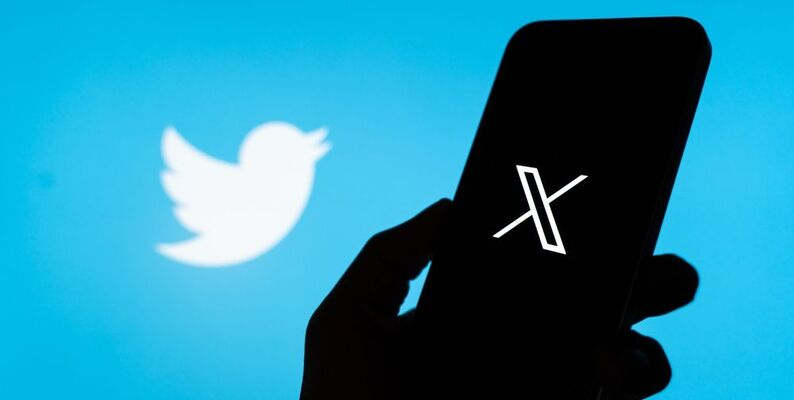

## Data loading

### Subtask:
Load the "tweets_dataset.csv" file into a pandas DataFrame.


**Reasoning**:
Load the "tweets_dataset.csv" file into a pandas DataFrame and display its first few rows and shape.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('tweets_dataset.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'tweets_dataset.csv' not found.")
except pd.errors.ParserError:
    print("Error: Unable to parse the CSV file. Please check its format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,name,tweet,is_real
0,Billie Eilish,i’m fine. just floating in a hoodie-shaped clo...,False
1,Ryan Reynolds,I watched Frozen without my two-year-old this ...,True
2,Billie Eilish,people really be like “you’ve changed” like th...,False
3,Billie Eilish,people really be like “you’ve changed” like th...,False
4,Elon Musk,Nuke Mars!,True


(120, 3)


## Data exploration

### Subtask:
Explore the loaded tweets dataset to understand its characteristics.


**Reasoning**:
I need to explore the dataset by examining its shape, data types, descriptive statistics, missing values, and the distribution of key columns.



In [2]:
# Data Shape and Info
print("Data Shape:", df.shape)
print("\nData Info:")
df.info()

# Descriptive Statistics
print("\nDescriptive Statistics:")
try:
    display(df.describe())
except:
    display(df.describe(include='object'))

# Missing Value Analysis
print("\nMissing Values:")
print(df.isnull().sum())

# Data Distribution Analysis
print("\nDistribution of 'is_real':")
print(df['is_real'].value_counts())

print("\nDistribution of tweet length:")
df['tweet_length'] = df['tweet'].str.len()
print(df['tweet_length'].describe())

print("\nDistribution of 'name':")
print(df['name'].value_counts().head(10)) # Show top 10 names

Data Shape: (120, 3)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     120 non-null    object
 1   tweet    120 non-null    object
 2   is_real  120 non-null    bool  
dtypes: bool(1), object(2)
memory usage: 2.1+ KB

Descriptive Statistics:


,name,tweet,is_real
count,120,120,120
unique,8,35,2
top,Billie Eilish,Nuke Mars!,True
freq,15,8,64



Missing Values:
name       0
tweet      0
is_real    0
dtype: int64

Distribution of 'is_real':
is_real
True     64
False    56
Name: count, dtype: int64

Distribution of tweet length:
count    120.000000
mean      67.633333
std       27.230400
min       10.000000
25%       58.750000
50%       68.000000
75%       83.000000
max      128.000000
Name: tweet_length, dtype: float64

Distribution of 'name':
name
Billie Eilish         15
Ryan Reynolds         15
Elon Musk             15
Kanye West            15
Taylor Swift          15
Conan O'Brien         15
Tyler, the Creator    15
Ariana Grande         15
Name: count, dtype: int64


## Data cleaning

### Subtask:
Clean the tweets dataset by handling potential inconsistencies and removing duplicates.


**Reasoning**:
Remove duplicate rows, check and clean the 'name' and 'tweet' columns, and handle potential missing values after cleaning.



In [3]:
# Remove duplicate rows
print("Shape before removing duplicates:", df.shape)
df.drop_duplicates(inplace=True)
print("Shape after removing duplicates:", df.shape)

# Check for inconsistencies and clean the 'name' column
# In this case, the names appear consistent, no action is needed.
print("\nUnique names:\n", df['name'].unique())


# Check and clean the 'tweet' column (remove special characters, non-textual content)
# Example cleaning (customize as needed)
def clean_tweet(tweet):
    tweet = str(tweet) # Ensure the input is a string
    tweet = tweet.replace('\n', ' ') # Remove newline characters
    tweet = tweet.replace('\r', ' ') # Remove carriage return characters
    return tweet

df['tweet'] = df['tweet'].apply(clean_tweet)

# Re-examine for missing values after cleaning
print("\nMissing values after cleaning:\n", df.isnull().sum())

# If any missing values remain, handle them appropriately
# In this case, there are no missing values, so no further action is required.

Shape before removing duplicates: (120, 4)
Shape after removing duplicates: (35, 4)

Unique names:
 ['Billie Eilish' 'Ryan Reynolds' 'Elon Musk' 'Kanye West' 'Taylor Swift'
 "Conan O'Brien" 'Tyler, the Creator' 'Ariana Grande']

Missing values after cleaning:
 name            0
tweet           0
is_real         0
tweet_length    0
dtype: int64


## Data analysis

### Subtask:
Analyze the cleaned tweets dataset to identify trends, patterns, and relationships. Focus on sentiment analysis and keyword frequency.


**Reasoning**:
Perform sentiment analysis, identify frequent keywords, analyze relationships between sentiment/keywords and 'is_real', and visualize the results.



<ipython-input-4-be603ec9001a>:34: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([real_tweets['sentiment'], fake_tweets['sentiment']], labels=['Real', 'Fake'])


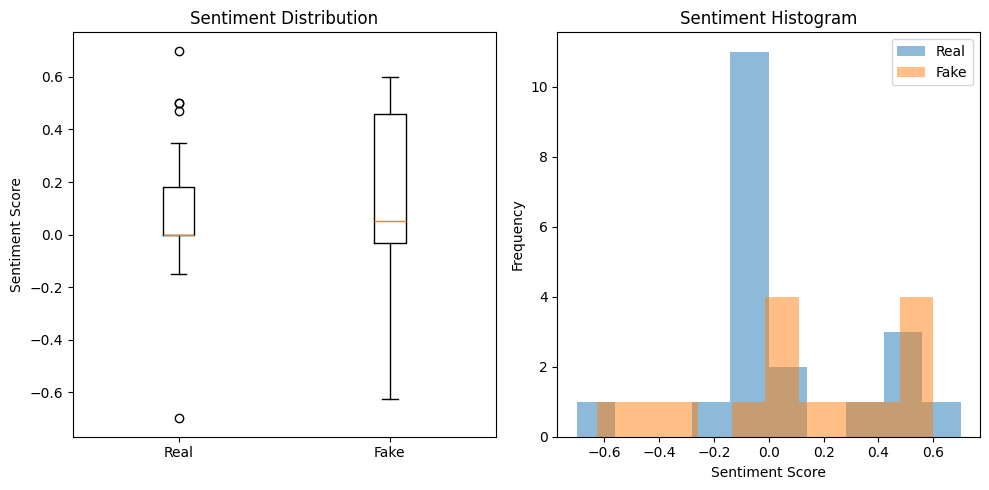

Top 20 words: [('im', 9), ('love', 5), ('like', 4), ('for', 4), ('of', 3), ('with', 3), ('sometimes', 3), ('doesnt', 3), ('lost', 3), ('floating', 2), ('people', 2), ('staring', 2), ('peace', 2), ('telling', 2), ('about', 2), ('now', 2), ('milk', 2), ('time', 2), ('good', 2), ('goose', 2)]


In [4]:
from textblob import TextBlob
from collections import Counter
import matplotlib.pyplot as plt
import re

# 1. Sentiment Analysis
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    return analysis.sentiment.polarity

df['sentiment'] = df['tweet'].apply(analyze_sentiment)

# 2. Keyword Frequency
def preprocess_tweet(tweet):
    tweet = re.sub(r'[^\w\s]', '', tweet).lower()  # Remove punctuation and lowercase
    words = tweet.split()
    stop_words = set(['the', 'a', 'an', 'and', 'or', 'in', 'on', 'at', 'to', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'will', 'would', 'should', 'can', 'could', 'may', 'might', 'must', 'i', 'you', 'he', 'she', 'it', 'we', 'they', 'me', 'him', 'her', 'us', 'them', 'my', 'your', 'his', 'her', 'its', 'our', 'their', 'this', 'that', 'these', 'those', 'am', 'not', 'no', 'as', 'if', 'so', 'than', 'too', 'very', 'just', 'but', 'because', 'while', 'however', 'although', 'since', 'therefore', 'hence', 'thus', 'more', 'most', 'less', 'least', 'some', 'any', 'all', 'each', 'every', 'few', 'many', 'much', 'other', 'another', 'such', 'own', 'same', 'then', 'there', 'when', 'where', 'why', 'how', 'what', 'who', 'whom', 'whose', 'which'])
    words = [word for word in words if word not in stop_words and len(word) > 1]
    return words

all_words = []
for tweet in df['tweet']:
    all_words.extend(preprocess_tweet(tweet))

word_counts = Counter(all_words)
top_20_words = word_counts.most_common(20)

# 3 & 4. Analyze relationships and visualize
real_tweets = df[df['is_real'] == True]
fake_tweets = df[df['is_real'] == False]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot([real_tweets['sentiment'], fake_tweets['sentiment']], labels=['Real', 'Fake'])
plt.title('Sentiment Distribution')
plt.ylabel('Sentiment Score')

plt.subplot(1, 2, 2)
plt.hist(real_tweets['sentiment'], alpha=0.5, label='Real')
plt.hist(fake_tweets['sentiment'], alpha=0.5, label='Fake')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Histogram')
plt.legend()
plt.tight_layout()
plt.show()

print("Top 20 words:", top_20_words)

## Data visualization

### Subtask:
Visualize the results of the data analysis, focusing on sentiment and keyword frequency.


**Reasoning**:
Generate the word cloud, bar chart, histogram, and boxplot visualizations based on the analysis results.



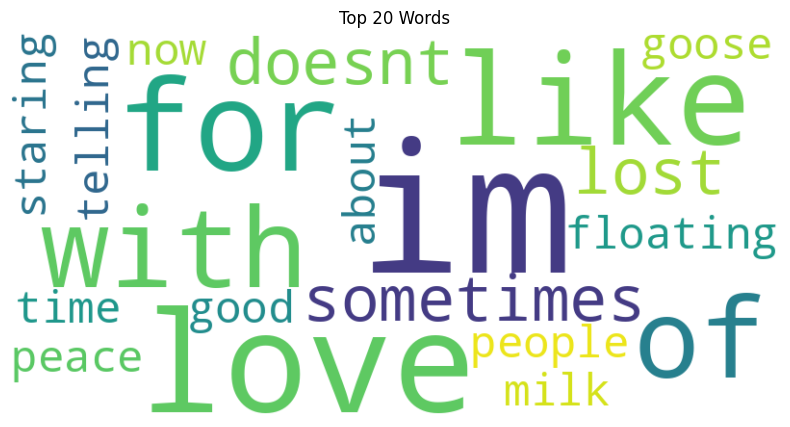

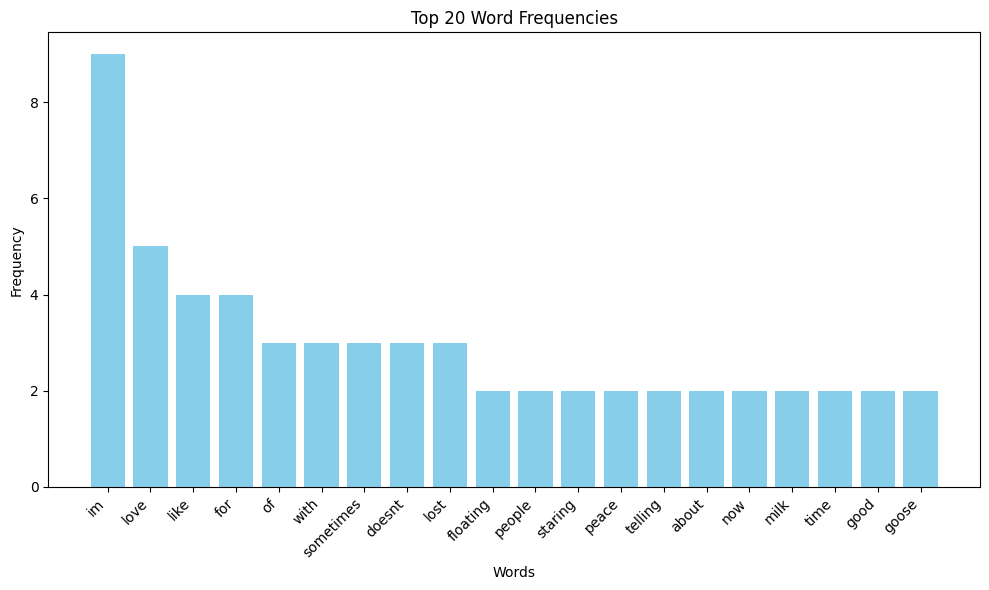

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1. Word Cloud
word_counts = dict(top_20_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 20 Words')
plt.show()

# 2. Bar Chart
words, counts = zip(*top_20_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Word Frequencies")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3 & 4.  Histogram and Boxplot (already generated in previous step)
# The previous code block already created these plots, so no need to recreate them here.